#### TS including a three-component noncovalent complex from SMILES, create ORCA input files, CSEARCH with CREST

###### Step 1: creating SMILES with predefined atom numbers and setting constrains

[Cl-:9].[F:4][C:5]([C:6]([H:12])([H:13])[H:14])([C:7]([H:15])([H:16])[H:17])[C:8]([H:18])([H:19])[H:20].[O:3]([H:10])[H:11]


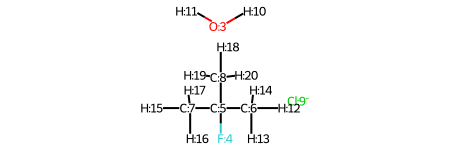

In [3]:
import os, glob
from pathlib import Path
from rdkit import Chem                                                                                                                                                         
from aqme.csearch import csearch
from aqme.qprep import qprep

smi = 'O.FC(C)(C)C.[Cl-]'
mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)
for i,atom in enumerate(mol.GetAtoms()):
    atom.SetAtomMapNum(i+3) 
# mapped SMILES to use in CSEARCH
smi_new = Chem.MolToSmiles(mol)

print(smi_new)
mol

In [ ]:
# based on the atom numbers above, I choose the constraints for my TS:
# 1) Bond between atoms 4 and 5 with a distance of 1.8 A
# 2) Bond between atoms 5 and 9 with a distance of 1.8 A
constraits_dist = [[4,5,1.8],[5,9,1.8]]

# 3) Angle between atoms 4, 5 and 9 of 180 degrees
constraits_angle = [[4,5,9,180]]

###### Step 2: doing CSEARCH

In [ ]:
w_dir_main = Path(os.getcwd())
sdf_path = w_dir_main.joinpath('TS-example')

# run CSEARCH conformational sampling, specifying:
# 1) Working directory (w_dir_main=w_dir_main)
# 2) PATH to create the new SDF files (destination=sdf_path)
# 3) Mapped SMILES string (smi=smi_new)
# 4) Name for the output SDF files (name='TS-example')
# 5) RDKit sampling (program='crest')
# 6) Include CREGEN post-analysis (cregen=True)
# 7) Specify that this a TS calculation (complex=True)
# 8) Define distance constraints (constraints_dist=constraits_dist)
# 9) Define angle constraints (constraints_angle=constraits_angle)
csearch(w_dir_main=w_dir_main,destination=sdf_path,smi=smi_new,
        name='TS-example',program='crest',cregen=True,complex=True,
        constraints_dist=constraits_dist,constraints_angle=constraits_angle)

###### Step 3: Writing Gaussian input files with the SDF files obtained from CSEARCH

In [ ]:
# set SDF filenames and directory where the new com files will be created
com_path = sdf_path.joinpath(f'com_files')
sdf_rdkit_files = glob.glob(f'{sdf_path}/*.sdf')

# run QPREP input files generator, with:
# 1) Working directory (w_dir_main=sdf_path)
# 2) PATH to create the new SDF files (destination=com_path)
# 3) Files to convert (files=file)
# 4) QM program for the input (program='gaussian')
# 5) Keyword line for the Gaussian inputs (qm_input='wb97xd/6-31+G* opt=(calcfc,ts,noeigen) freq')
# 6) Memory to use in the calculations (mem='24GB')
# 7) Processors to use in the calcs (nprocs=8)
qprep(w_dir_main=sdf_path,destination=com_path,files=sdf_rdkit_files,program='gaussian',
        qm_input='wb97xd/6-31+G* opt=(calcfc,ts,noeigen) freq',mem='24GB',nprocs=8)